In [31]:
import os
import sys
import zipfile
import subprocess
import pandas as pd
from datetime import date, timedelta
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv("ml1.csv")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)
df2 = df.loc["2020":]
df3 = df2.drop(columns=["ma_60", "rsi", "macd", "volume", "dividends", "stock_splits", "marketcap", "gain_14", "loss_14", "rsi_14", "ema_12", "ema_26", "rsi_lag_5", "rsi_lag_10"])
df3.reset_index(inplace=True)


In [37]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)
df2 = df.loc["2020":]

In [38]:
df3 = df2.drop(columns=["ma_60", "rsi", "macd", "volume", "dividends", "stock_splits", "marketcap", "gain_14", "loss_14", "rsi_14", "ema_12", "ema_26", "rsi_lag_5", "rsi_lag_10"])

In [39]:
df3.reset_index(inplace=True)

In [40]:
df3.head()

,date,company,close,sector,subsector,ma_20,bb_lower,bb_upper,price_change
0,2020-01-02,DXCM,54.845001,health care,Health Care Equipment,54.176625,50.947796,57.405454,0.160000
1,2020-01-02,CHTR,490.429993,communication services,Cable & Satellite,474.381998,457.370478,491.393518,5.350006
2,2020-01-02,GIS,44.325157,consumer staples,Packaged Foods & Meats,44.882085,43.728688,46.035482,-1.215889
3,2020-01-02,CRWD,49.439999,information technology,Systems Software,49.532000,45.851412,53.212587,-0.430000
4,2020-01-02,TRV,123.024483,financials,Property & Casualty Insurance,121.560904,119.805976,123.315831,0.500977


In [64]:
from datetime import datetime, timedelta

top = pd.read_csv("top_20.csv")

future = datetime.today().date() + timedelta(days=30)
top["date"] = pd.to_datetime(future)

top.drop(columns=["close", "gain_predicted"], inplace=True)
top.rename(columns={"prediction": "close"}, inplace=True)

merged = pd.concat([df3, top], ignore_index=True)
merged.sort_values(by="date", inplace=True)

In [81]:
merged

,date,company,close,sector,subsector,ma_20,bb_lower,bb_upper,price_change
0,2020-01-02,DXCM,54.845001,health care,Health Care Equipment,54.176625,50.947796,57.405454,0.160000
332,2020-01-02,NRG,32.794971,utilities,Independent Power Producers & Energy Traders,33.291117,32.207802,34.374432,-0.802967
331,2020-01-02,LEN,52.302334,consumer discretionary,Homebuilding,53.755849,50.853573,56.658124,0.018749
330,2020-01-02,CMI,157.518280,industrials,Construction Machinery & Heavy Transportation ...,158.763868,155.934334,161.593402,0.316269
329,2020-01-02,AKAM,87.639999,information technology,Internet Services & Infrastructure,85.326500,82.998752,87.654248,1.260002
...,...,...,...,...,...,...,...,...,...
614916,2025-01-14,JKHY,196.125780,NaN,NaN,NaN,NaN,NaN,NaN
614915,2025-01-14,NVDA,146.451080,NaN,NaN,NaN,NaN,NaN,NaN
614914,2025-01-14,CPT,131.102040,NaN,NaN,NaN,NaN,NaN,NaN
614927,2025-01-14,CB,300.572360,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
merged.sort_values(by="date", inplace=True)
merged

KeyError: 'date'

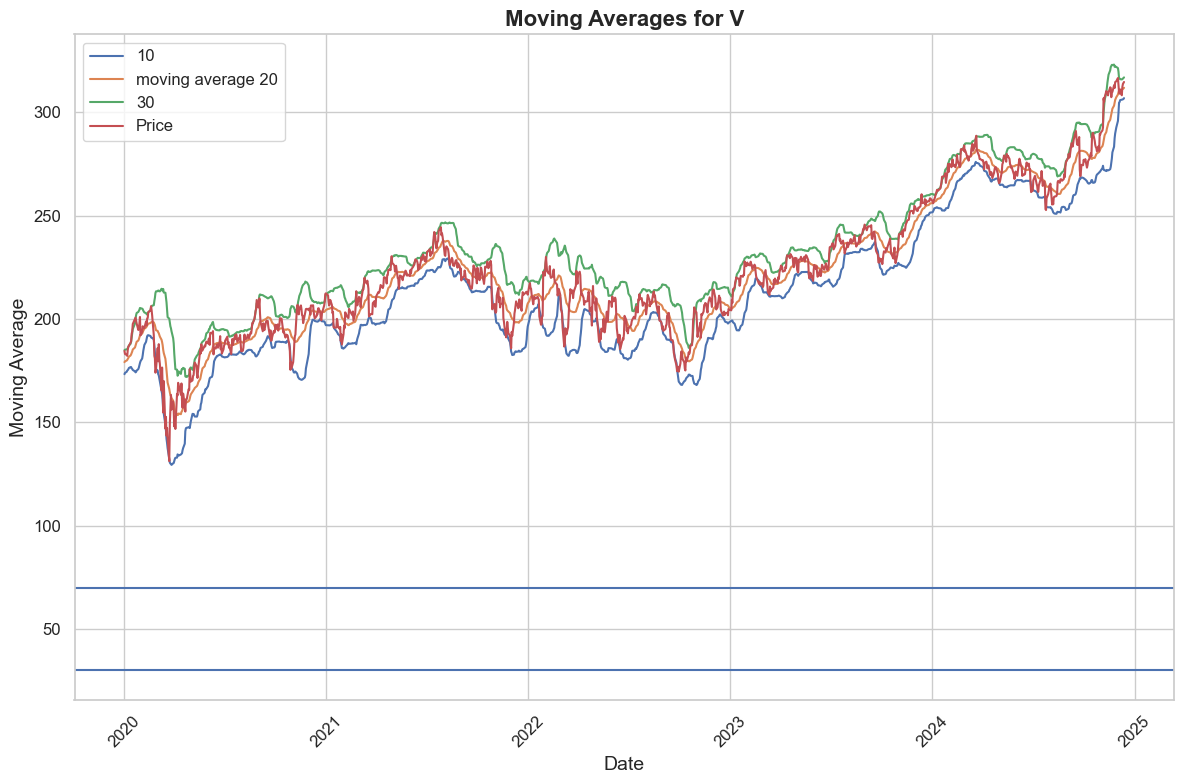

In [41]:
# plotting for test

co = "V"



plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

sns.lineplot(data=df3[df3["company"] == co], x="date", y="bb_lower", label="10")
sns.lineplot(data=df3[df3["company"] == co], x="date", y="ma_20", label="moving average 20")
sns.lineplot(data=df3[df3["company"] == co], x="date", y="bb_upper", label="30")
sns.lineplot(data=df3[df3["company"] == co], x="date", y="close", label="Price")

plt.axhline(y=70)
plt.axhline(y=30)

plt.title(f'Moving Averages for {co}', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Moving Average', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc='best')
plt.tight_layout()